In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from smc_utils import drop_identifiers

In [2]:
%matplotlib inline

In [2]:
data_dir = os.path.join("..", "Data")
df = pd.read_excel(os.path.join(data_dir, "SMC_DATA_clean.xlsx"))
df = drop_identifiers(df)
df.head()

,UniqueID,ParticipantID,ParticipantRecordCount,SEMESTER,SURVEY,Timestamp,STATE_behaviors,STATE_goals,COVID_residence,COVID_social_distancing,...,ADTS_ANX_total_diff,ADTS_P_total_diff,ADTS_N_total_diff,RSES_total_diff,SWLS_total_diff,PSOC_total_diff,LONE_total_diff,SoPA_total_diff,SoNA_total_diff,ChQ_total_diff
0,a9dbc45ece05459c91b7073f94165d9d,5710075738,5,Fall 2020,0,2020-09-20 17:17:09.790,"I generally use Reddit, Snapchat, Twitter, Ins...",I’d like to see myself distance a bit from soc...,In Boulder,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e25bccd85f6e4450b4d7482ed2368fa0,5710075738,5,Fall 2020,1,2020-09-26 21:36:08.963,NaN,NaN,NaN,NaN,...,3.0,0.0,-3.0,2.0,1.0,3.0,0.0,NaN,NaN,NaN
2,e58dce6b780b4e2b89f850f4b8a91352,5710075738,5,Fall 2020,2,2020-10-04 21:12:24.774,NaN,NaN,NaN,NaN,...,-2.0,-3.0,1.0,9.0,7.0,-1.0,-2.0,NaN,NaN,NaN
3,34c77a8cc9db4cf4b3e05cfbe3314443,5710075738,5,Fall 2020,3,2020-10-12 10:23:31.748,NaN,NaN,NaN,NaN,...,-3.0,2.0,2.0,-2.0,-1.0,5.0,1.0,NaN,NaN,NaN
4,1f92e68056a94c0584ac911c9b264766,5710075738,5,Fall 2020,4,2020-10-25 23:49:54.287,NaN,NaN,NaN,NaN,...,-1.0,0.0,0.0,4.0,2.0,-1.0,0.0,NaN,NaN,NaN


In [3]:
len(df)

2607

### Participant Count

In [4]:
df.groupby('ParticipantID')['ParticipantRecordCount'].max().value_counts()

5    413
4     95
3     40
1     14
2     14
Name: ParticipantRecordCount, dtype: int64

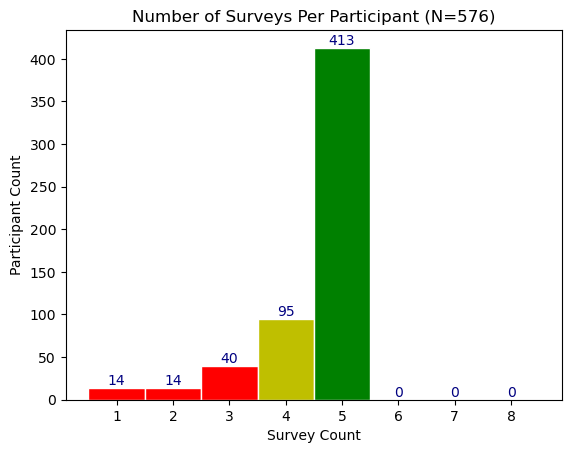

In [5]:
fig, ax = plt.subplots()
data = df.groupby('ParticipantID')['ParticipantRecordCount'].max()

bins = [i-0.5 for i in range(1,10)]
N, bins, patches = ax.hist(data, edgecolor='white', align='mid', bins=bins)

for i in range(0,3):
    patches[i].set_facecolor('r')
patches[3].set_facecolor('y')
for i in range(4,6):    
    patches[i].set_facecolor('g')
for i in range(6, len(patches)):
    patches[i].set_facecolor('black')

plt.bar_label(patches, fontsize=10, color='navy')
plt.title("Number of Surveys Per Participant (N={})".format(len(data)))
plt.xlabel("Survey Count")
plt.ylabel("Participant Count")
plt.show()

### Initial Correlations

In [8]:
def calculate_rough_word_count(x):
    return len(x.split())

df_initial = df[df['SURVEY'] == 0][['ParticipantID','STATE_behaviors']]

df_initial['STATE_behaviors_wc'] = df_initial['STATE_behaviors'].apply(calculate_rough_word_count)

In [9]:
df_initial

,ParticipantID,STATE_behaviors,STATE_behaviors_wc
0,5710075738,"I generally use Reddit, Snapchat, Twitter, Ins...",116
5,2563157200,Most used platforms:\n- instagram\n- snapchat\...,121
10,2122687351,"\n- I probably check each one 5 times a day, d...",143
15,480385374,I use reddit and occasionally YouTube. I used ...,142
20,5859634604,"I use youtube, amazon video, netflix all for c...",198
...,...,...,...
2575,4364018283,I use TikTok for about an hour a day; I connec...,40
2580,3945155124,I use TikTok and Snapchat the most. Usually I ...,360
2584,3981192960,"I use Instagram, Snapchat, YouTube, and a few ...",29
2595,712532050,- I use SnapChat and TikTok the most\n- I use ...,57


In [10]:
df_initial['STATE_behaviors_wc'].describe()

count     506.000000
mean      176.612648
std       126.118427
min         1.000000
25%        99.250000
50%       148.000000
75%       215.500000
max      1085.000000
Name: STATE_behaviors_wc, dtype: float64

#### Notes
We are considering word count of participants self-described behavior as a proxy variable for "level of commitment" to the SMC challenge.

Grouping data into quartiles:

    STATE_behavior_and_goals word count
        25% - 99
        50% - 148
        75% - 215
        IQR = 116

In [11]:
df_wc = df_initial[['ParticipantID','STATE_behaviors_wc']]

df = df.merge(df_wc, on='ParticipantID', how='left')

In [12]:
interest_cols = [c for c in df.columns if c.endswith('_total') or c.endswith('_score') or c.endswith('_wc')]

### Correlations across full dataset

In [13]:
df[interest_cols].corr()[['WEEKLY_self_assessment_score']]

,WEEKLY_self_assessment_score
BSMAS_total,-0.414837
PSS_total,-0.267315
ADTS_ANX_total,-0.197095
ADTS_P_total,0.003724
ADTS_N_total,0.014358
RSES_total,0.022241
SWLS_total,0.161537
PSOC_total,0.133929
LONE_total,-0.072814
SoPA_total,0.209498


In [14]:
df[interest_cols].corr().loc[['STATE_behaviors_wc']]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total,WEEKLY_self_assessment_score,STATE_behaviors_wc
STATE_behaviors_wc,0.015436,0.0102,0.074766,0.103335,-0.021953,0.097827,0.055502,0.088756,-0.055982,-0.062566,-0.023338,0.116217,-0.066576,1.0


In [15]:
len(df)

2607

### STATE_behavior_and_goals word count correlations

In [18]:
df_behavior_q1 = df[df['STATE_behaviors_wc'] <= 99]
df_behavior_q23 = df[(df['STATE_behaviors_wc'] > 99) & (df['STATE_behaviors_wc'] <= 215)]
df_behavior_q4 = df[df['STATE_behaviors_wc'] > 215]

len_bq1 = len(df_behavior_q1)
len_bq23 = len(df_behavior_q23)
len_bq4 = len(df_behavior_q4)

print("Behavior DF lengths:\n Q1={}\n Q2,3={}\n Q4={}".format(len_bq1, len_bq23, len_bq4))

Behavior DF lengths:
 Q1=565
 Q2,3=1209
 Q4=613


In [19]:
df_behavior_q1[interest_cols].corr().loc[['STATE_behaviors_wc']]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total,WEEKLY_self_assessment_score,STATE_behaviors_wc
STATE_behaviors_wc,-0.058835,-0.197369,-0.137454,-0.089232,-0.133525,0.116287,0.205852,0.27356,-0.173564,0.077599,-0.131428,0.291355,-0.020503,1.0


In [20]:
df_behavior_q23[interest_cols].corr().loc[['STATE_behaviors_wc']]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total,WEEKLY_self_assessment_score,STATE_behaviors_wc
STATE_behaviors_wc,0.059541,0.128945,-0.039338,0.036574,-0.067672,0.080333,0.062617,-0.07996,0.070174,0.172516,-0.143768,-0.081719,-0.014787,1.0


In [21]:
df_behavior_q4[interest_cols].corr().loc[['STATE_behaviors_wc']]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total,WEEKLY_self_assessment_score,STATE_behaviors_wc
STATE_behaviors_wc,-0.078012,-0.075395,0.032608,0.174637,-0.056628,-0.033016,0.13439,0.09678,-0.126081,-0.411839,0.801054,-0.750165,-0.110762,1.0


#### 10th Percentile 

In [22]:
df['STATE_behaviors_wc'].quantile(.1)

69.0

In [26]:
df[df['STATE_behaviors_wc'] <= 69][interest_cols].corr().loc[['STATE_behaviors_wc']]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total,WEEKLY_self_assessment_score,STATE_behaviors_wc
STATE_behaviors_wc,0.140044,-0.286313,0.312927,0.343953,-0.072255,0.16551,0.276383,0.396965,-0.101408,0.020537,-0.120907,0.12239,-0.238923,1.0


#### 90th Percentile

In [24]:
df['STATE_behaviors_wc'].quantile(.9)

324.0

In [27]:
df[df['STATE_behaviors_wc'] > 324][interest_cols].corr().loc[['STATE_behaviors_wc']]

,BSMAS_total,PSS_total,ADTS_ANX_total,ADTS_P_total,ADTS_N_total,RSES_total,SWLS_total,PSOC_total,LONE_total,SoPA_total,SoNA_total,ChQ_total,WEEKLY_self_assessment_score,STATE_behaviors_wc
STATE_behaviors_wc,-0.087133,-0.065138,0.024018,0.16185,-0.184953,-0.097882,-0.036487,0.150328,-0.232271,-0.814659,0.980735,0.903999,-0.231636,1.0


### Observations
- There are some interesting correlational differences bewtween those participants who wrote the most in their SM behaviors and those who wrote the least
- Correlations of interest between word count:
    - BSMAS, PSS, SWLS, PSOC, **SoPA & SoNA**, ChQ 